<a href="https://colab.research.google.com/github/Elakkiya1802/ML-tasks/blob/main/task6(nn_model_for_handwritten_digit_recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1, Loss: 0.3427, Accuracy: 90.81%
Epoch 2, Loss: 0.1536, Accuracy: 95.45%
Epoch 3, Loss: 0.1070, Accuracy: 96.82%
Epoch 4, Loss: 0.0806, Accuracy: 97.62%
Epoch 5, Loss: 0.0643, Accuracy: 98.09%


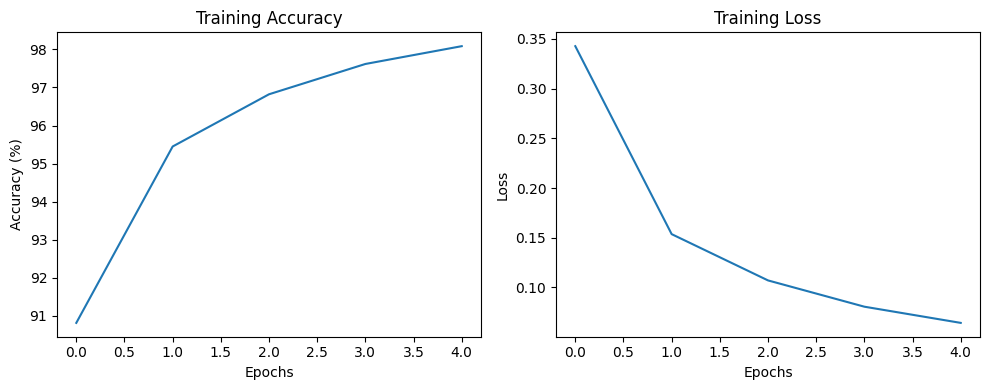

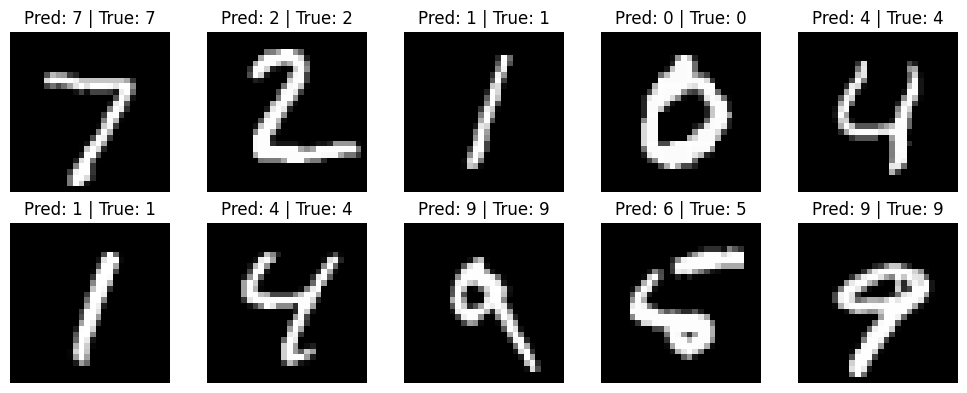

Test Accuracy: 97.53%


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
transform = transforms.ToTensor()

train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=64, shuffle=False)

# Simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN().to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists for visualization
train_acc_list = []
train_loss_list = []

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    accuracy = 100 * correct / total
    avg_loss = total_loss / len(train_loader)

    train_acc_list.append(accuracy)
    train_loss_list.append(avg_loss)

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

# ----- Plot Training Curves -----
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(train_acc_list)
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")

plt.subplot(1,2,2)
plt.plot(train_loss_list)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.tight_layout()
plt.show()

# ----- Visualize Predictions -----
model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    predicted = torch.argmax(outputs, dim=1)

plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i].cpu().squeeze(), cmap='gray')
    plt.title(f"Pred: {predicted[i].item()} | True: {labels[i].item()}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# ----- Test accuracy -----
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(f"Test Accuracy: {100 * correct / total:.2f}%")
